# Случайность в вероятности и на практике

О подходах к понятию случайности: 

Н.К. Верещагин, В.А. Успенский, А. Шень. Колмогоровская сложность и алгоритмическая случайность. 
https://www.mccme.ru/free-books/shen/kolmbook.pdf

А.Н. Ширяев. Случайность в вероятности (доклад на семинаре кафедры теории веротяностей). http://www.mathnet.ru:8080/PresentFiles/21897/bsk_2018_10_17_shiryaev_an_randomness_in_probability_slides.pdf

## Генераторы случайных чисел

Что происходит при вызове, напрмер, ```np.random.rand()```?

Как устроен источник случайной последовательности?

![img](https://cdn.ablebits.com/_img-blog/random-generator/random-generator.png)

Рассмотрим простой и популрный алгоритм - Linear congruential generator (LCG). При вызове функции ```rand()``` в C/C++ происзодит обращение именно к LCG.

Linear congruential generator производит последовательность:
$$ z_{i+1} = (az_i + c) \mod m $$

Число $z_0$ называется *seed* и обеспечивает воспроизводимость последовательности “случайных” чисел.

Напишем функцию, которая реализует LCG:

In [ ]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

Выведем несколько первых элементов последовательности:

In [ ]:
[rng() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

Выбор параметров $m$, $a$ и $c$ существенно влияет на качество последовательности. Если параметры выбрать наобум, это может привести к неожиданным последствиям:

In [ ]:
def rng(m=97, a=5, c=0):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 7

random = [rng() for i in range(1000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[0.36082474226804123,
 0.8041237113402062,
 0.020618556701030927,
 0.10309278350515463,
 0.5154639175257731,
 0.5773195876288659,
 0.8865979381443299,
 0.4329896907216495,
 0.16494845360824742,
 0.8247422680412371]

Гистограмма распределения похожа на равномерное:

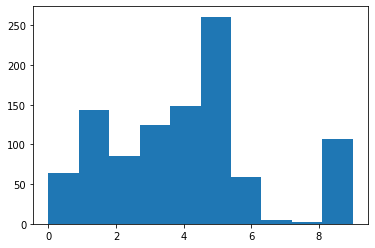

In [3]:
import matplotlib.pyplot as plt
plt.hist(random)
plt.show()

Однако, спектральный тест показывает, что точки располагаются на гиперплоскостях, что плохо согласуется с предствалением о случайности:

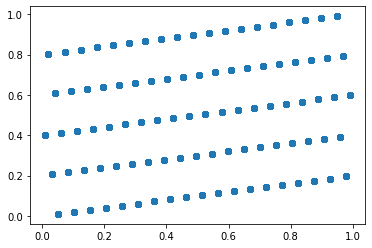

In [ ]:
plt.scatter(random[1:], random[:-1])
plt.show()

Более аккуратный выбор параметров приводит с более "случайному" распределению:

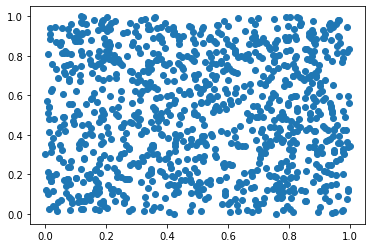

In [ ]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

Существует набор тестов для проверки "случайности". Например, тесты [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).

Больше методов генерации собрано [здесь](https://en.wikipedia.org/wiki/List_of_random_number_generators).

Сюжет про динамические системы и переход к хаосу https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

## Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения $F$?



### Задача
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


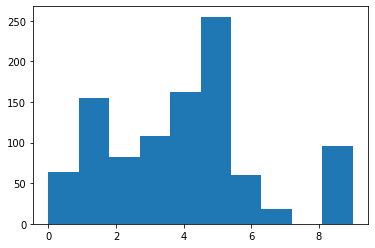

elapsed: 0.0003085136413574219


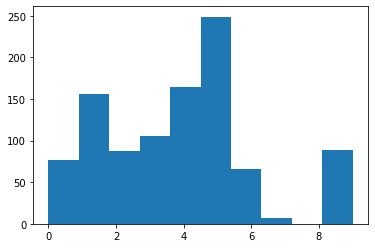

elapsed: 0.0005362033843994141


In [4]:
import time as tm
import numpy as np
import math as mt
import random as rn
arr = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
s_t = tm.time()
arr_1 = arr / arr.sum()
arr_1 = arr_1.cumsum()
rnd = np.random.rand(1000)
random = np.searchsorted(arr_1, rnd)
e_t = tm.time()
plt.hist(random)
plt.show()
print('elapsed:', e_t - s_t)

s_t = tm.time()
arr_2 = np.sort(arr)
ind = np.argsort(arr)
arr_2 /= arr_2.sum()
arr_2 = arr_2.cumsum()
rnd = np.random.rand(1000)
random = ind[np.searchsorted(arr_2, rnd)]
e_t = tm.time()
plt.hist(random)
plt.show()
print('elapsed:', e_t - s_t)

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

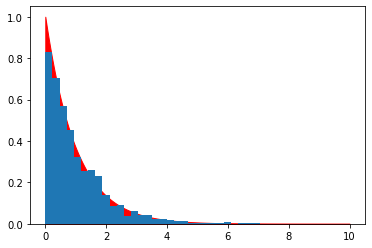

In [ ]:
lam = 1
rnd = np.random.rand(1000)
random = [-1 / lam * np.log(1 - rnd[i]) for i in range(1000)]
plt.hist(random, bins = 30, density = True)

X = np.linspace(0, 10, 256)
D = lam * np.exp(-lam * X)
plt.fill_between(X, 0, D, color = 'r')
plt.show()

### Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Картинка иллюстрирует идею метода:
<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>
 

### Задача
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

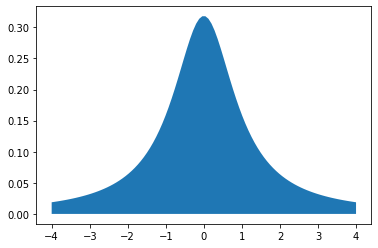

In [ ]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()


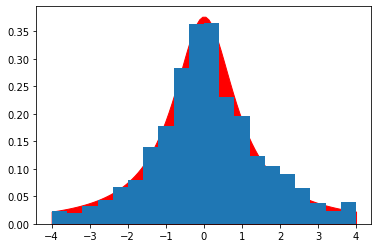

In [ ]:
k = 1 / (2 * mt.atan(4))
n = 0
res = []
while(n < 1000):
    x = rn.uniform(-4, 4)
    y = rn.uniform(0, k)
    if(y < k / (1 + x * x)):
        res.append(x)
        n += 1
plt.hist(res, bins = 20, density = True)

X = np.linspace(-4, 4, 100)
D = k / (1 + X ** 2)
plt.fill_between(X, 0, D, color = 'r')
plt.show()

##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

### Задача
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

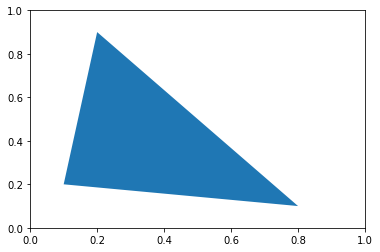

In [ ]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

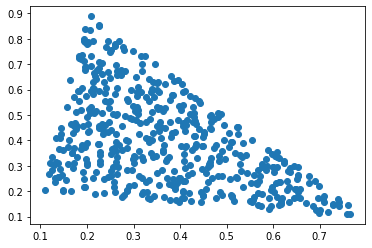

In [ ]:
rnd_0 = np.random.rand(500)
rnd_1 = np.array([(1 - mt.sqrt(1 - rnd_0[i])) for i in range(500)]) #абсциссы случайно распределённых точек из треугольника с вершинами (0, 0), (1, 0) и (1, 1)
rnd_2 = np.random.rand(500) * (1 - rnd_1) #ординаты этих точек
rnd_x = 0.1 + 0.7 * rnd_1 + 0.1 * rnd_2 #абсциссы после аффинного преобразования
rnd_y = 0.2 - 0.1 * rnd_1 + 0.7 * rnd_2 #то же для ординат
plt.scatter(rnd_x, rnd_y)
plt.show()

### Задача
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

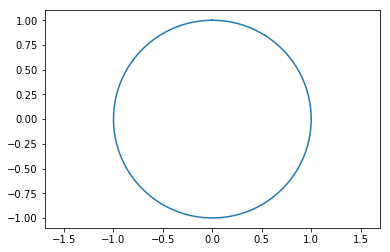

In [ ]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

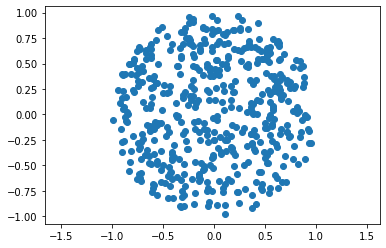

In [ ]:
rnd_r = np.sqrt(np.random.rand(500)) #радиусы "равномерно" распределённых точек
rnd_phi = np.random.rand(500) * 2 * np.pi #полярные углы
plt.scatter(rnd_r * np.cos(rnd_phi), rnd_r * np.sin(rnd_phi))
plt.axis('equal')
plt.show()

### Задача
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

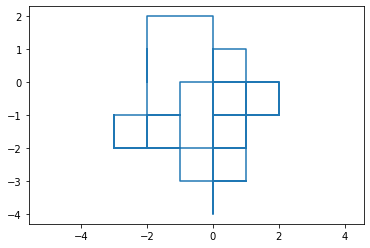

In [ ]:
rnd_1 = np.sort(np.random.randint(0, 51, 50)) + np.arange(50)
rnd_2 = np.sort(np.random.randint(0, 51, 50)) + np.arange(50)
rnd_3 = np.full(100, 1)
rnd_3[rnd_1] = -1
rnd_4 = np.full(100, 1)
rnd_4[rnd_2] = -1
rnd_3 = rnd_3.cumsum()
rnd_4 = rnd_4.cumsum()
rnd_x = (rnd_3 + rnd_4) / 2
rnd_y = (rnd_3 - rnd_4) / 2
np.insert(rnd_x, 0, 0)
np.insert(rnd_y, 0, 0)
plt.plot(rnd_x, rnd_y)
plt.axis('equal')
plt.show()

## Random normal generator

### Задача
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

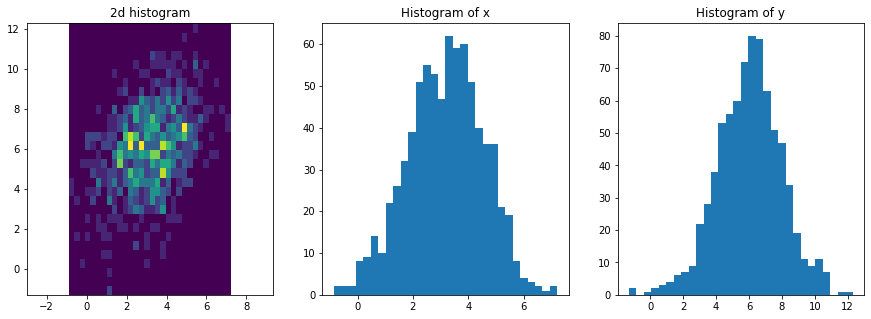

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

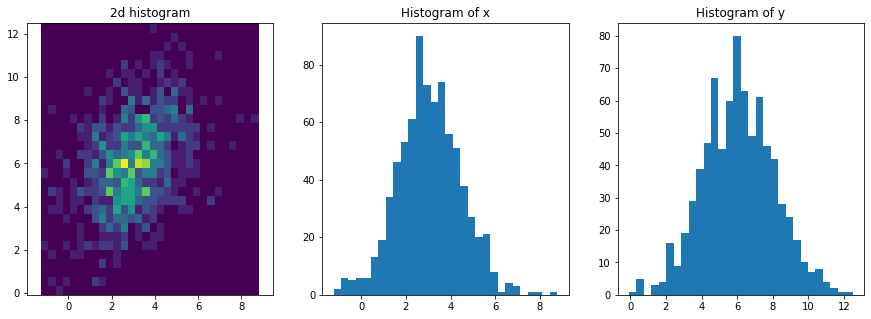

In [ ]:

n = 0
x = []
y = []
while(n < 1000):
    u= rn.uniform(-1, 1)
    v = rn.uniform(-1, 1)
    s = u * u + v * v
    if(s > 0 and s <= 1):
        x.append(u * mt.sqrt(-2 * mt.log(s) / s))
        y.append(v * mt.sqrt(-2 * mt.log(s) / s))
    n += 1
x = np.array(x)
y = np.array(y)
y *= mt.sqrt(7 / 2)
y += 1 / mt.sqrt(2) * x
x *= mt.sqrt(2)
x += 3
y += 6
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

### Задача
Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.


In [ ]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
print(np.linalg.det(B))
print(np.linalg.det(B[np.arange(8)][:, np.arange(8)]))
A = np.zeros((9, 9))
A8 = np.linalg.cholesky(B[np.arange(8)][:, np.arange(8)])
for i in range(8):
    for j in range(8):
        A[i, j] = A8[i, j]
A[8] = -A[0] - A[4]
rnd_1 = np.random.normal(size = (9, 1000000))
rnd_2 = np.dot(A, rnd_1)
S_n = 0
n = 0
while(True):
    x = rn.uniform(-1, 1)
    y = rn.uniform(-1, 1)
    if(x * x + y * y <= 1):
        S_n += 4
    n += 1
    if(abs(S_n / n - np.pi) < 0.001):
        print(n)
        break

0.0
10125.000000000007
955


### Задача
С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число $\pi$. Теоретически обоснуйте необходимое число бросаний, чтобы оценить число $\pi$ с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.


In [5]:
import math
import random
def monte_carlo(n):
    inside = 0
    for i in np.arange(n):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        if math.sqrt((x**2+y**2)) < 1.0:
            inside += 1
# inside / n = pi / 4
    pi = (float(inside) / n) * 4
    return(pi)
monte_carlo(700000)

3.140902857142857

### Задача

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [ ]:
bin_coef = np.zeros((101, 101))
for i in range(101):
    bin_coef[i, 0] = 1
    for j in range(1, i + 1):
        bin_coef[i, j] = bin_coef[i - 1, j - 1] + bin_coef[i - 1, j]

B = np.zeros(101)
B[0] = 1
for i in range(1, 101):
    s = 0
    for j in range(i):
        s += bin_coef[i - 1, j] * B[j]
    B[i] = s

sum = 0
for i in range(1000):
    x = rn.random()
    s = 0
    K = 0
    while(s < x):
        K += 1
        s += K ** 100 / (mt.factorial(K) * np.e * B[100])
    C = np.random.randint(1, K + 1, 100)
    sum += len(np.unique(C))
print(0.001 * sum)

28.699
